In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
def discrete_df_0(annual_rate, n_year, t_year):
    return 1 / (1 + annual_rate)**t_year

def discrete_df_1(annual_rate, n_year, t_year):
    return 1 / (1 + annual_rate/n_year)**(t_year*n_year)

def continuous_df(annual_rate, n_year, t_year):
    return np.exp(-annual_rate*t_year)

x = discrete_df_0
print(x(0.1, 2, 1))

x = discrete_df_1
print(x(0.1, 2, 1))

x = continuous_df
print(x(0.1, 2, 1))

0.9090909090909091
0.9070294784580498
0.9048374180359595


In [59]:
annual_rate = 0.115
annual_coupon = 70
nominal = 1000
maturity = 3 # years
n_year = 2 # number of compounds per year
compounding = 'discrete1' # discrete0/1 or continuous

r = rate/n_year
c = coupon_yearly/n_year

if compounding == 'discrete0': 
    discount_factor_func = discrete_df_0
elif compounding == 'discrete1': # used in Internet apps for bond price calculations
    discount_factor_func = discrete_df_1
else: # continuous
    discount_factor_func = continuous_df

time_years = []
cf = []
dcf = []
bond_price = 0
for t in range(1, maturity*n_year+1):
    time_years.append(t/n_year)
    cf.append(c)
    discount_factor = discount_factor_func(annual_rate, n_year, t/n_year)
    dcf.append(c * discount_factor)
    #print(bond_price)

cf[-1] += nominal
dcf[-1] += nominal * discount_factor
bond_price = sum(dcf)

round(bond_price, 2)

888.49

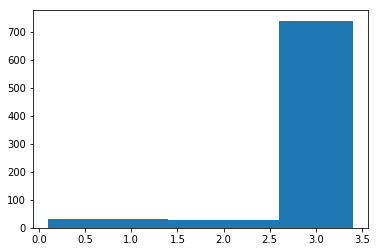

In [61]:
plt.bar(x=time_years, height=dcf);

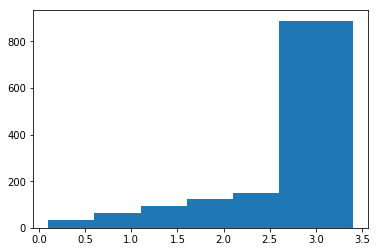

In [65]:
plt.bar(x=time_years, height=np.cumsum(dcf));